In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
shapec = gpd.read_file('2011_Dist.shp')
shapec.head()
shape_state = gpd.read_file('2011_Dist.shp')
shape_state.head()
editst=pd.read_csv('edit_st.csv')
edit1=shape_state.merge(editst, left_on = 'ST_NM', right_on ='state_trial');

edit2=edit1.drop(columns=["state_trial","ST_NM"])
edit3=edit2[['state_name11','geometry']]
final1=edit3.dissolve(by="state_name11")
final1.head()
Allst=pd.read_csv('2001_ind_st.csv')
Allst.head()
for_plotstates = final1.merge(Allst, left_on = 'state_name11', right_on = 'st_nm');
for_plotstates.head()
for_plotstates["center"] = for_plotstates["geometry"].centroid
for_plotstates_points = for_plotstates.copy()
for_plotstates_points.set_geometry("center", inplace = True)

In [38]:
Alld=pd.read_csv('clssnumpy.csv')
Alld.urban_rural_ratio

0         1.445115
1         0.026649
2         0.000000
3         0.960654
4      2000.000000
          ...     
636       0.131267
637       0.520076
638       0.149294
639       0.136789
640            NaN
Name: urban_rural_ratio, Length: 641, dtype: float64

In [39]:
for_plot = shapec.merge(Alld, left_on = 'censuscode', right_on = 'censuscode');

C:\Users\hp\anaconda3\envs\Geopandas\lib\site-packages\mapclassify\classifiers.py:418: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\Users\hp\anaconda3\envs\Geopandas\lib\site-packages\mapclassify\classifiers.py:418: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k


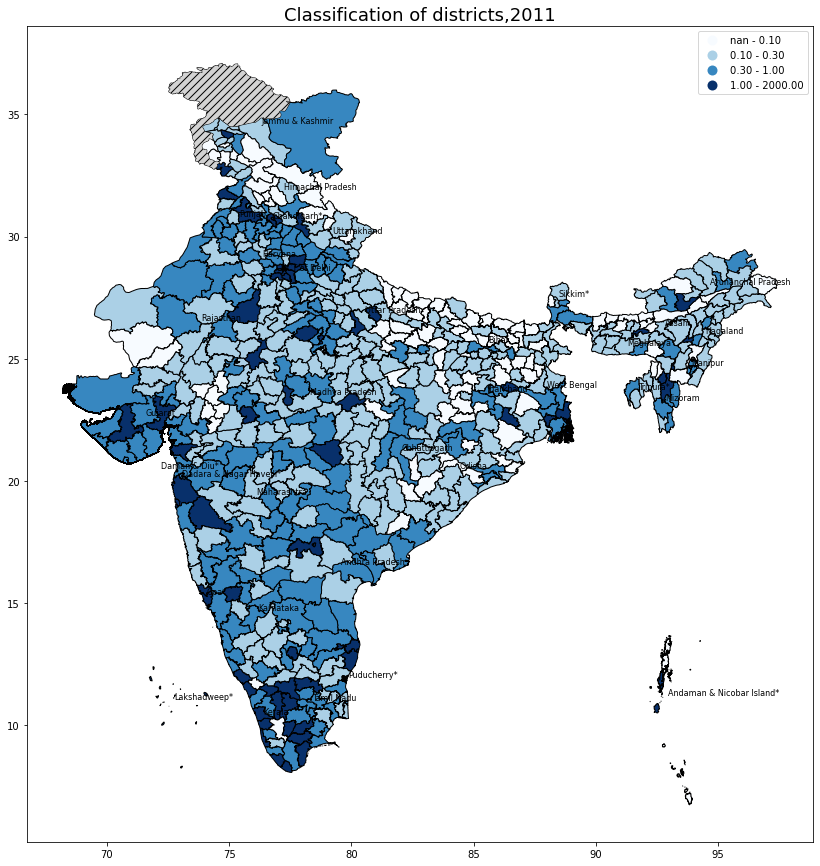

In [57]:

ax=for_plot.plot(column='urban_rural_ratio',cmap ='Blues',edgecolor='black',figsize=(20,15),scheme='User_Defined',legend =True,classification_kwds=dict(bins=[0.10,0.3,1.0,2000]));
plt.title('Classification according to urbanisation, 2011', fontsize=18)
for_plot[for_plot.urban_rural_ratio.isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title('Classification of districts,2011', fontsize=18)
texts = []

for x, y, label in zip(for_plotstates_points.geometry.x,for_plotstates_points.geometry.y,for_plotstates_points["st_nm11"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [46]:
plt.savefig('ind_dist_updated.png',format='png',dpi=1200)

<Figure size 432x288 with 0 Axes>

ValueError: Length of values does not match length of index

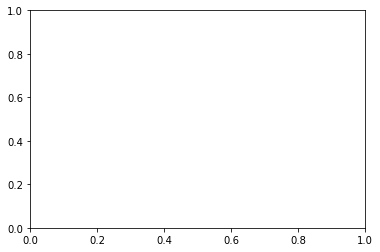

In [13]:
import mapclassify as mc
ur_ratio=for_plot['urban rural ratio'];
m5=mc.UserDefined(ur_ratio, bins=[0.1,0.3,1.0,2000])
m5.plot(shapec)


TypeError: Invalid keyword argument for 'userdefined' 

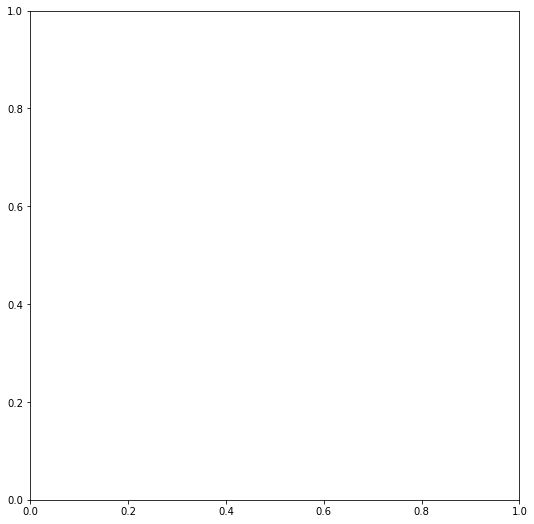

In [10]:
ax = for_plot.dropna().plot(column='class', cmap ='YlGnBu', figsize=(15,9),scheme='UserDefined', k=4, legend =True);